<a href="https://colab.research.google.com/github/Hamzaman10/SYSC4906_Assignments/blob/main/SYSC4415W23_A2_Hamza_Zafar_101119026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYSC4415 - Assignment 2

**TA: François Charih \<francois@charih.ca\>**

**Deadline: March 19th, 2023 @ 11:59PM**

## Learning objectives

1. Fine-tune pre-trained CNN architectures for a custom image classification challenge.

2. Evaluate the performance of machine learning models using different metrics (precision-recall curve, confusion matrices, *etc.*).

3. Get hands-on experience with modern machine learning and plotting libraries.

## Instructions

1. Give yourself plenty of time to complete the assignment (it could take you up to 8-10 hours if you are unfamiliar with Python and machine learning libraries). The models should not take more than 1h to fine-tune (my full notebook runs from start to end in a little under 40 minutes. Coding will be the most time-consuming. ⚠️**Do not wait to the last minute.** ⚠️

2. You must use the prescribed methods/functions/libraries mentioned, whenever specified. The functions you need are already imported for you in the appropriate sections. You can reorganize the imports and import the full packages instead of specific functions if you so desire. I imported the necessary function for you so that they are ready to be invoked without have to specify the full path to the functions with the dot operator (i.e. so that you invoke `function()` instead of `package.module.function()`).

3. Make sure to include comments for non-trivial code. It is okay to add some code cells, if you think it will give your code better readability/structure.

4. If you are unsure about something, clearly state your assumptions and complete the question based off these assumptions.

5. Be careful as you complete the assignment. There are several text-based questions to be answered in Markdown (text) cells. The questions are accompanied by the ❓ emoji. Your answers should be entered in the markdown cells with the 📝 emoji.

6. Submit your Notebook as both a `.ipynb` file that adopts this naming convention: *SYSC4415W23_A2_\<First Name\>_\<Last Name\>_\<StudentID\>.ipynb* on Brightspace. I should be able to run your code without errors.

7. Make sure you enable a GPU accelerator (in Runtime > Change runtime type) starting at Part 4 and that your training code uses it. GPU resources are limited, so it is recommended not to use the accelerator for prior steps.

8. All plots should be made with matplotlib and labeled properly (ie. include axis labels and legends).

## Context

It is 2030, and a new RNA virus named SARS-CoV-3 is wreaking havoc across the globe. Its death rate is estimated at 95%, making it one of the deadliest  respiratory viruses known to mankind. Fortunately, an Ottawa-based biotech company developed a nasally-delivered vaccine *Greenraza*™️ that can neutralize the virus in living patients. However, administrating the vaccine increases the risk of lung cancer by a whooping 60%. It is therefore vital that the drug be administered to infected patients only, not to patients infected with another respiratory virus such as the common cold or influenza. The virus cannot be detected through blood or breath analyses. It can only be detected by means of x-ray imaging.

Having heard of your newly developed expertise in deep learning, you have been tasked by the Ottawa Hospital with the design of a machine learning model capable of distinguishing patients infected with SARS-CoV-3 from patients that have pneumonia and non-infected patients. Healthy patients can be discharged, while patients with pneumonia must be isolated, but without being given *Greenraza*™️.

## Project initialization

Run the cells below to set-up the notebook (ie. download the dataset) and install the required external libraries.

In [ ]:
# RUN THIS (downloads the dataset)
! rm -rf SYSC4415W23_A2_dataset SYSC4415W23_A2_dataset.zip
! wget https://github.com/jrgreen7/SYSC4906/releases/download/Assignment2/SYSC4415W23_A2_dataset.zip && unzip SYSC4415W23_A2_dataset.zip

In [ ]:
# RUN THIS (installs external libraries)
!pip install timm
!pip install git+https://github.com/nottombrown/imagenet_stubs
!pip install torchstat

## Part 1: Preparing the dataset

The Ottawa Hospital has provided you with a dataset to develop your model. The dataset is available here. The dataset contains a folder containing a spreadsheet with metadata for each image in the dataset and a subfolder containing the 200x200 images (with random filenames).

In [ ]:
from pandas import read_csv
from matplotlib.pyplot import bar, xlabel, ylabel, title

**Step 1:** Using pandas' `read_csv` function, load the dataframe containing the image metadata (`dataset_metadata.csv`).

In [ ]:
# Loads the image metadata into a pandas dataframe

# YOUR CODE HERE

metadata = read_csv("/content/SYSC4415W23_A2_dataset/dataset_metadata.csv")

**Step 2:** Use the `head` method to print the top five rows of the dataframe.

In [ ]:
# Prints the top five rows in the dataset

# YOUR CODE HERE

print(metadata.head())

          filename     split            xray_date  height  width   label
0   272_normal.jpg  training  2030-11-18 06:50:42     200    200  normal
1   788_normal.jpg  training  2030-06-20 21:32:45     200    200  normal
2   622_normal.jpg  training  2030-07-12 06:56:19     200    200  normal
3  1138_normal.jpg  training  2030-03-15 13:52:16     200    200  normal
4  1568_normal.jpg  training  2030-12-22 22:09:18     200    200  normal


**Step 3:** Using pandas' [query method](https://pandas.pydata.org/docs/user_guide/indexing.html#the-query-method) and the `len` methods on the selections, print the number of images in the training, validation and test sets.

In [ ]:
# Prints the dimensions of the dataframe

# YOUR CODE HERE

print("the number of images in the training set is:", len(metadata.query('split == "training"')))
print("the number of images in the test set is:", len(metadata.query('split == "test"')))
print("the number of images in the validation set is:", len(metadata.query('split == "validation"')))

the number of images in the training set is: 2222
the number of images in the test set is: 505
the number of images in the validation set is: 645


**Step 4:** Using the `value_counts` method on the “label” column, provide the composition of the dataset in terms of the number of SARS-CoV-3 cases, pneumonia cases and healthy x-rays. In another cell, prepare a bar chart from that data using matplotlib's `bar` method. Note that the result of the `value_counts` methods is a series object whose property `index` is the label.

In [ ]:
# Generates a breakdown of the images' classes

# YOUR CODE HERE
#sarscov3 pneumonia

print(metadata['label'].value_counts())

normal       1500
pneumonia    1300
sarscov3      572
Name: label, dtype: int64


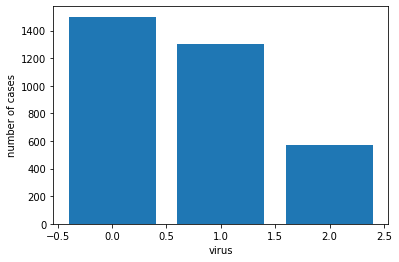

In [ ]:
# Plots a bar chart

# YOUR CODE HERE


query = (metadata['label'].value_counts())
bar(range(len(query)), query)
x = xlabel("virus")
y = ylabel("number of cases")
title = ("Test")




❓ ***Question: Is the data balanced or not? If not, specify why class imbalance makes classification more difficult, and suggest one method you could use to deal with the imbalanced data.***

Yes this dataset is imbalanced, as we can see there's significantly more normal and pneumonia cases than saars-cov. This makes classification more difficult because it can cause the model to be biased towards normal and pneumonia. One method to deal with this is oversampling. With oversampling yo ucan duplicate the data in the minority class to increase the number of it's examples

📝 YOUR ANSWER GOES HERE



## Part 2: Applying pre-trained CNN models to the data

Researchers make pre-trained neural networks available to the community at large. There are many, many pre-trained CNNs available in online repositories that researchers can leverage for their own applications.

In [ ]:
from torchvision.io import read_image
from timm import create_model
from matplotlib.pyplot import imread, imshow
from imagenet_stubs.imagenet_2012_labels import label_to_name
import torch

**Step 1:** Display the image `SYSC4415W23_A2_dataset/training/sarscov3/100_sarscov3.jpg` from the test set. The matplotlib methods `imread` and `imshow` are useful. 😉

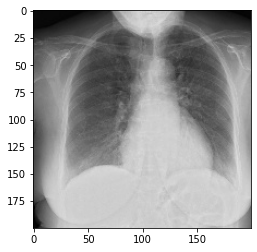

In [ ]:
# Display the image with matplotlib's imread/imshow

# YOUR CODE HERE
display = imread('SYSC4415W23_A2_dataset/training/sarscov3/100_sarscov3.jpg')
imshow(display)

**Step 2:** Load the ImageNet-pretrained InceptionV3 (`inception_v3`) and ResNet50 (`resnet50`) models with `timm` (this was done in Anthony's CIFAR100 tutorial with PyTorch). Use them to predict the class of the image along with the probability (not the logit). The probability is the result of applying the softmax function to the logits.

Of course, because the models were pretrained on ImageNet, it will not predict any of the classes that interest us.

***Notes:**
1. The `read_image` function can convert an image on disk to a tensor.

2. The function `label_to_name` that I imported for you converts the index of an ImageNet class to its English name.

In [ ]:
# Loads the image in a Tensor (the method read_image can load the image in a tensor), calls unsqueeze(0) on the tensor to add a dimension and convert its entries to floats using the .float() method

# YOUR CODE HERE

#read image
img = read_image('SYSC4415W23_A2_dataset/training/sarscov3/100_sarscov3.jpg')
img = img.unsqueeze(0)
img = img.float()
print(img)

tensor([[[[ 10.,  10.,  10.,  ...,   7.,   7.,   7.],
          [ 10.,  10.,  10.,  ...,   8.,   8.,   7.],
          [ 10.,  10.,  10.,  ...,   6.,   7.,   7.],
          ...,
          [  9.,   8.,   6.,  ..., 121., 115., 109.],
          [  4.,   8.,   8.,  ..., 121., 115., 109.],
          [  8.,   7.,   3.,  ..., 119., 112., 105.]],

         [[ 10.,  10.,  10.,  ...,   7.,   7.,   7.],
          [ 10.,  10.,  10.,  ...,   8.,   8.,   7.],
          [ 10.,  10.,  10.,  ...,   6.,   7.,   7.],
          ...,
          [  9.,   8.,   6.,  ..., 121., 115., 109.],
          [  4.,   8.,   8.,  ..., 121., 115., 109.],
          [  8.,   7.,   3.,  ..., 119., 112., 105.]],

         [[ 10.,  10.,  10.,  ...,   7.,   7.,   7.],
          [ 10.,  10.,  10.,  ...,   8.,   8.,   7.],
          [ 10.,  10.,  10.,  ...,   6.,   7.,   7.],
          ...,
          [  9.,   8.,   6.,  ..., 121., 115., 109.],
          [  4.,   8.,   8.,  ..., 121., 115., 109.],
          [  8.,   7.,   3.,  ...

In [ ]:
# Loads the InceptionV3 model predicted class along with its probability

# YOUR CODE HERE
inceptionV3Model = create_model('inception_v3', pretrained=True)
output = inceptionV3Model(img)
softmax = output.softmax(1)
print(softmax)

tensor([[0.0009, 0.0010, 0.0009, 0.0008, 0.0012, 0.0009, 0.0008, 0.0010, 0.0009,
         0.0009, 0.0009, 0.0009, 0.0008, 0.0009, 0.0008, 0.0010, 0.0009, 0.0009,
         0.0011, 0.0008, 0.0011, 0.0010, 0.0008, 0.0011, 0.0009, 0.0010, 0.0012,
         0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0011, 0.0009, 0.0009, 0.0008,
         0.0010, 0.0009, 0.0011, 0.0009, 0.0009, 0.0008, 0.0010, 0.0009, 0.0009,
         0.0010, 0.0009, 0.0009, 0.0009, 0.0010, 0.0010, 0.0012, 0.0010, 0.0009,
         0.0011, 0.0010, 0.0009, 0.0009, 0.0008, 0.0010, 0.0010, 0.0010, 0.0010,
         0.0009, 0.0008, 0.0009, 0.0010, 0.0010, 0.0008, 0.0009, 0.0008, 0.0009,
         0.0008, 0.0008, 0.0009, 0.0008, 0.0010, 0.0009, 0.0009, 0.0010, 0.0010,
         0.0010, 0.0011, 0.0009, 0.0009, 0.0009, 0.0011, 0.0009, 0.0010, 0.0009,
         0.0009, 0.0009, 0.0009, 0.0011, 0.0009, 0.0009, 0.0010, 0.0009, 0.0010,
         0.0010, 0.0008, 0.0009, 0.0009, 0.0011, 0.0011, 0.0009, 0.0010, 0.0007,
         0.0009, 0.0009, 0.0

In [ ]:
# Loads the ResNet50 model predicted class along with its probability

# YOUR CODE HERE
ResNet50Model = create_model('resnet50d', pretrained=True)
output = ResNet50Model(img)
softmax = output.softmax(1)
print(softmax)

tensor([[0.0011, 0.0009, 0.0011, 0.0012, 0.0013, 0.0013, 0.0010, 0.0009, 0.0008,
         0.0009, 0.0011, 0.0011, 0.0010, 0.0011, 0.0010, 0.0010, 0.0012, 0.0010,
         0.0011, 0.0009, 0.0010, 0.0010, 0.0010, 0.0009, 0.0009, 0.0009, 0.0011,
         0.0011, 0.0009, 0.0013, 0.0008, 0.0012, 0.0009, 0.0009, 0.0010, 0.0008,
         0.0010, 0.0010, 0.0011, 0.0012, 0.0011, 0.0010, 0.0009, 0.0010, 0.0011,
         0.0010, 0.0010, 0.0011, 0.0009, 0.0009, 0.0009, 0.0009, 0.0014, 0.0011,
         0.0009, 0.0011, 0.0009, 0.0010, 0.0011, 0.0013, 0.0011, 0.0012, 0.0010,
         0.0014, 0.0012, 0.0013, 0.0012, 0.0011, 0.0010, 0.0012, 0.0009, 0.0010,
         0.0010, 0.0010, 0.0008, 0.0011, 0.0009, 0.0008, 0.0011, 0.0009, 0.0009,
         0.0008, 0.0009, 0.0008, 0.0010, 0.0008, 0.0010, 0.0012, 0.0008, 0.0010,
         0.0008, 0.0009, 0.0010, 0.0010, 0.0009, 0.0011, 0.0010, 0.0008, 0.0009,
         0.0010, 0.0009, 0.0011, 0.0008, 0.0016, 0.0011, 0.0010, 0.0010, 0.0010,
         0.0008, 0.0010, 0.0

❓ ***Question: What classes are predicted for the two models? Are the models confident? Is it a good thing?***

📝 YOUR ANSWERS GO HERE

## Part 3: Instantiating the dataloaders to perform fine tuning
When working with large image datasets with PyTorch, people often implement a DataLoader to help manage how images are loaded during training. The dataloader can be combined with methods that implement data augmentation by modifying the images with transforms (eg. scaling, rotation, reflection, cropping, etc.). For the most common applications, there are existing data loaders that are perfectly suitable and that users can use instead of defining their own.


In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms

**Step 1:** Using the `ImageFolder` strategy to build a dataloader with a batch size of 128 for training. ([This tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#afterword-torchvision) is most helpful.)

You will also want your dataloader for your training set to apply the following data augmentation transforms (documentation available [here](https://pytorch.org/vision/stable/transforms.html)):

1. Random rotation between -10 and 10
2. Random horizontal flip with 40% probability

In [ ]:
# Creates the dataset and dataloader that will be used for training

# YOUR CODE HERE

batch_size = 128

data_transform = transforms.Compose([
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(p=0.4),
        transforms.ToTensor()
    ])


training_dataset = ImageFolder(root='/content/SYSC4415W23_A2_dataset/training',
                               transform=data_transform)
training_loader = DataLoader(training_dataset, batch_size =batch_size, shuffle =True)

**Step 2**: Create the dataloaders you will be using for validation and testing. The transform should only convert the images to a tensor. You should not specify a batch size for the test set dataloader.

In [ ]:
# Creates the dataloader that will be used for validation

# YOUR CODE HERE


validation_dataset = ImageFolder(root='/content/SYSC4415W23_A2_dataset/validation',
                               transform=data_transform)
validation_loader = DataLoader(training_dataset, batch_size =batch_size, shuffle =True)

In [ ]:
# Creates the dataloader that will be used testing

# YOUR CODE HERE


test_dataset = ImageFolder(root='/content/SYSC4415W23_A2_dataset/test',
                               transform=data_transform)
test_loader = DataLoader(training_dataset,
                         batch_size=batch_size, shuffle=True)

## Part 4: Fine-tuning existing CNN architectures

The Inception V3 and ResNet50 models you loaded above were trained on ImageNet which is not a medical dataset. In order to leverage these models for our purposes, we need to modify the architecture so that the final classification layer contains an appropriate number of classes and retune the model weights so that the models become suitable for the classification of our x-rays.


In [ ]:
from timm import create_model
import time
import matplotlib.pyplot as plt
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from torch import no_grad, Tensor
from torch import cuda

**Step 1:** Using `create_model` from the `timm` package, Load the InceptionV3 and ResNet50 models, replacing the final layer with one appropriate for our purpose (recall that we want to classify x-rays of healthy, pneumonia and SARS-CoV-3 patients). Note that the timm library can assist in replacing the final layer (see [Anthony's tutorial](https://github.com/jrgreen7/SYSC4906/blob/master/W2023/Tutorials/CIFAR100_tutorial_WIP.ipynb)). These are your modified models.

In [ ]:
# Loads the InceptionV3 model and replaces the final classification layer with a new dense layer

# YOUR CODE HERE
inceptionV3Model = create_model('inception_v3', num_classes=3, pretrained=True)

In [ ]:
# Loads the ResNet50 model and replaces the final classification layer with a new dense layer

# YOUR CODE HERE
ResNet50Model = create_model('resnet50d', num_classes=3, pretrained=True)

**Step 2:** In a tutorial with Anthony, you have seen that you can convert a base learning rate to an effective learning rate based on the batch size you have selected using the following heuristic:

$$\eta_{eff} = \frac{B\eta_{base}}{256}$$

where $\eta$ is the learning rate and $B$ is the batch size.

Train the final layer modified InceptionV3 and ResNet50 models on your training set. Use the **base** learning rate $\eta_{base}$ of 0.0005.

Use the following settings:

**Epochs:** 25

**Optimizer:** AdamW

**Loss function:** Cross-entropy (it is not required here, but note that using the weight parameter here could help deal with class imbalance)

Implement the training loop yourself. Do not use a package that automates the process. Anthony has demonstrated how to do this and much can be taken from [his example](https://github.com/jrgreen7/SYSC4906/blob/master/W2023/Tutorials/CIFAR100_tutorial_WIP.ipynb).

❗**Important: Make sure you are using a colab gpu and to store the mean training and validation performance/loss at each epoch as you will be plotting them in the next steps.**

In [ ]:
# Moves the modified inceptionV3 model to GPU

# YOUR CODE HERE
inceptionV3Model.cuda()



InceptionV3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride

In [ ]:
# Instantiates the optimizer for the modified InceptionV3 model using the specified effective learning rate

# YOUR CODE HERE

base_lr = 0.0005
learning_rate = base_lr * batch_size / 256
opt = AdamW(inceptionV3Model.parameters(), lr=learning_rate)


In [ ]:
# Sets up the loss function for the modified InceptionV3 model

# YOUR CODE HERE
loss_function = CrossEntropyLoss()

In [ ]:
# Fine-tunes the weights in the final layer the modified InceptionV3 model (main learning loop)

# YOUR CODE HERE

epochs = 25
inceptionV3TrainMean = []  # Store the mean training loss values from each epoch
inceptionV3ValMean = []  # Store the mean validation loss values from each epoch

#below was taken from anthony's tutorial
for epoch in range(epochs):
  start_time = time.time()

  train_loss = []
  inceptionV3Model.train()
  for batch in training_loader:
    batch_imgs, batch_labels = batch
    batch_imgs = batch_imgs.cuda()
    batch_labels = batch_labels.cuda()
    logits = inceptionV3Model(batch_imgs)
    loss = loss_function(logits, batch_labels)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_loss.append(loss.item())

  val_losses = []
  inceptionV3Model.eval()  # put model in "eval" mode
  with torch.no_grad():  # when evaluating, we don't need gradients
      for batch in validation_loader:
          batch_imgs, batch_labels = batch
          batch_imgs = batch_imgs.cuda()  # (bsz, 3, 32, 32)
          batch_labels = batch_labels.cuda()  # (bsz)

          logits = inceptionV3Model(batch_imgs)  # (bsz, 100)
          loss = loss_function(logits, batch_labels)
          val_losses.append(loss.item())

  train_time = time.time() - start_time
  epoch_train_loss = torch.Tensor(train_loss).mean().item()
  epoch_val_loss = torch.Tensor(val_losses).mean().item()

  inceptionV3TrainMean.append(epoch_train_loss)
  inceptionV3ValMean.append(epoch_val_loss)
  print(f'Epoch: {epoch}  Train Loss: {epoch_train_loss:8.6f}   Val Loss: {epoch_val_loss:8.6f}  Time: {train_time:6.4f}')

Epoch: 0  Train Loss: 0.431590   Val Loss: 0.958650  Time: 13.9839
Epoch: 1  Train Loss: 0.146051   Val Loss: 0.118562  Time: 10.3532
Epoch: 2  Train Loss: 0.087482   Val Loss: 0.090354  Time: 10.2547
Epoch: 3  Train Loss: 0.069915   Val Loss: 0.053129  Time: 10.4191
Epoch: 4  Train Loss: 0.041009   Val Loss: 0.032283  Time: 10.4963
Epoch: 5  Train Loss: 0.048203   Val Loss: 0.029192  Time: 10.4212
Epoch: 6  Train Loss: 0.046471   Val Loss: 0.023052  Time: 10.3681
Epoch: 7  Train Loss: 0.042797   Val Loss: 0.053499  Time: 10.3696
Epoch: 8  Train Loss: 0.031839   Val Loss: 0.020437  Time: 10.3094
Epoch: 9  Train Loss: 0.025683   Val Loss: 0.020162  Time: 10.3527
Epoch: 10  Train Loss: 0.021905   Val Loss: 0.005838  Time: 10.3518
Epoch: 11  Train Loss: 0.028921   Val Loss: 0.016792  Time: 10.2539
Epoch: 12  Train Loss: 0.037239   Val Loss: 0.027712  Time: 10.3567
Epoch: 13  Train Loss: 0.018520   Val Loss: 0.006079  Time: 10.3424
Epoch: 14  Train Loss: 0.009737   Val Loss: 0.012546  Time

In [ ]:
# Moves the modified ResNet50 model to GPU

# YOUR CODE HERE
ResNet50Model.cuda()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

In [ ]:
# Instantiates the optimizer for the modified ResNet50 model

# YOUR CODE HERE
base_lr = 0.0005
learning_rate = base_lr * batch_size / 256
opt = AdamW(ResNet50Model.parameters(), lr=learning_rate)

In [ ]:
# Sets up the loss function for the modified ResNet50 model

# YOUR CODE HERE

loss_function = CrossEntropyLoss()

In [ ]:
# Fine-tunes the weights in the final layer the modified ResNet50 model (main learning loop)

# YOUR CODE HERE
resNet50TrainMean = [] #store the mean loss values from each epoch
resNet50ValMean = []

#below was taken from anthony's tutorial
for epoch in range(epochs):
  start_time = time.time()
  train_loss = []
  ResNet50Model.train()
  for batch in training_loader:
    batch_imgs, batch_labels = batch
    batch_imgs = batch_imgs.cuda()
    batch_labels = batch_labels.cuda()
    logits = ResNet50Model(batch_imgs)
    loss = loss_function(logits, batch_labels)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_loss.append(loss.item())

  val_losses = []
  ResNet50Model.eval()  # put model in "eval" mode
  with torch.no_grad():
      for batch in validation_loader:
          batch_imgs, batch_labels = batch
          batch_imgs = batch_imgs.cuda()
          batch_labels = batch_labels.cuda()

          logits = ResNet50Model(batch_imgs)
          loss = loss_function(logits, batch_labels)
          val_losses.append(loss.item())

  train_time = time.time() - start_time
  #find the mean training and validation losses for the current epoch
  epoch_train_loss = torch.Tensor(train_loss).mean().item()
  epoch_val_loss = torch.Tensor(val_losses).mean().item()

  #append
  resNet50TrainMean.append(epoch_train_loss)
  resNet50ValMean.append(epoch_val_loss)
  print(f'Epoch: {epoch}  Train Loss: {epoch_train_loss:8.6f}   Val Loss: {epoch_val_loss:8.6f}  Time: {train_time:6.4f}')

Epoch: 0  Train Loss: 0.960653   Val Loss: 0.946065  Time: 11.5292
Epoch: 1  Train Loss: 0.638513   Val Loss: 0.804221  Time: 11.4284
Epoch: 2  Train Loss: 0.391133   Val Loss: 0.430910  Time: 11.4264
Epoch: 3  Train Loss: 0.248592   Val Loss: 0.206514  Time: 11.4148
Epoch: 4  Train Loss: 0.166490   Val Loss: 0.138090  Time: 11.4080
Epoch: 5  Train Loss: 0.126530   Val Loss: 0.105061  Time: 11.3938
Epoch: 6  Train Loss: 0.107925   Val Loss: 0.082318  Time: 11.3575
Epoch: 7  Train Loss: 0.085985   Val Loss: 0.067827  Time: 11.4241
Epoch: 8  Train Loss: 0.069741   Val Loss: 0.048706  Time: 11.5141
Epoch: 9  Train Loss: 0.056428   Val Loss: 0.047709  Time: 11.6426
Epoch: 10  Train Loss: 0.051767   Val Loss: 0.035926  Time: 11.4889
Epoch: 11  Train Loss: 0.040641   Val Loss: 0.029323  Time: 11.4432
Epoch: 12  Train Loss: 0.041472   Val Loss: 0.023127  Time: 11.4148
Epoch: 13  Train Loss: 0.032657   Val Loss: 0.019510  Time: 11.4928
Epoch: 14  Train Loss: 0.033480   Val Loss: 0.021300  Time

**Step 3:** In different labeled subplots, display the learning curves for each model. Each subplot should display loss on the training set and the validation set (*i.e.* 2 curves per subplot). Use matplotlib.

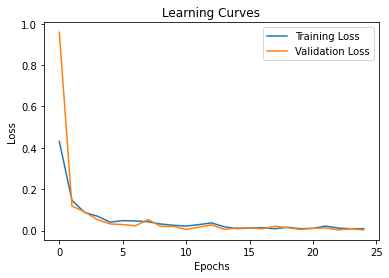

In [ ]:
# Displays the learning curves (loss) for both models in two separate subplots

# YOUR CODE HERE

fig, ax = plt.subplots()

ax.plot(inceptionV3TrainMean, label='Training Loss')
ax.plot(inceptionV3ValMean, label='Validation Loss')

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Learning Curves')

plt.legend()
plt.show()


❓ ***Question: Comment on your learning curves. What do they tell you?***

The training loss and validation loss curves are very close to eachother throughout the training process. This shows us that the model has been trained well and that it is able to able to apply what it has learned to untrained data effectively

📝 YOUR ANSWER GOES HERE

## Part 5: Performance evaluation on a test set

Of course, estimating the performance of your model on unseen data is a key step in machine learning methodology. Here, you will summarize model performance for your InceptionV3 model and ResNet50 model on the test set.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from torch import no_grad

**Step 1:** Iterate through the images in the test set using the test dataloader to make predictions for the test set images and retrieve their actual label (its index). Note that this is done in a way similar to the validation step in the training loop.

Append the predicted class index to a list, the actual labels to another and the probability of the SARS-CoV-3 class to another list.

Do this for both fine-tuned models.

Note that the indices map to the classes as follows:

0: normal

1: pneumonia

2: sarscov3

In [ ]:
# Creates a list of predictions, a list of actual labels and a list of probabilities of the SARS-CoV-3 class for the fine-tuned InceptionV3 model applied to the test set

# YOUR CODE HERE
# For InceptionV3 model

# For InceptionV3 model
inceptionV3Prediction = []
inceptionV3Actual = []
inceptionV3Probability = []

inceptionV3Model.eval()
with no_grad():
  #iterate over test set
    for batch in test_loader:
        batch_imgs, batch_labels = batch

        #load images and labels into gpu
        batch_imgs = batch_imgs.cuda()
        batch_labels = batch_labels.cuda()

        #compute logits
        logits = inceptionV3Model(batch_imgs)
        #apply softmax to ensure probability distribution between [0, 1.0] adds ups to 1.0
        probs = torch.softmax(logits, dim=1)
        #find class with highest probability
        preds = torch.argmax(logits, dim=1)

        #append to list
        inceptionV3Prediction.extend(preds.cpu().numpy())
        inceptionV3Actual.extend(batch_labels.cpu().numpy())
        inceptionV3Probability.extend(probs.cpu().numpy())

#output results
print("InceptionV3 Model Results:")
for index in range(len(inceptionV3Prediction)):
    print(f'Index: {index} | Prediction: {inceptionV3Prediction[index]} | Actual: {inceptionV3Actual[index]} | Probability SARS-CoV-3: {inceptionV3Probability[index][2]:.2f}')




In [ ]:
# Creates a list of predictions, a list of actual labels and a list of probabilities of the SARS-CoV-3 class for the fine-tuned ResNet50 model applied to the test set

# YOUR CODE HERE

# For ResNet50 model
resnet50Prediction  = []
resnet50Actual = []
resnet50Probability = []

ResNet50Model.eval()
with no_grad():
    #iterate over test set
    for batch in test_loader:
        batch_imgs, batch_labels = batch

        #load images and labels into gpu
        batch_imgs = batch_imgs.cuda()
        batch_labels = batch_labels.cuda()

        #compute logits
        logits = ResNet50Model(batch_imgs)
        #apply softmax to ensure probability distribution between [0, 1.0] adds ups to 1.0
        probs = torch.softmax(logits, dim=1)
        #find class with highest probability
        preds = torch.argmax(logits, dim=1)

        #append to list
        resnet50Prediction.extend(preds.cpu().numpy())
        resnet50Actual.extend(batch_labels.cpu().numpy())
        resnet50Probability.extend(probs[:, 2].cpu().numpy())

#output results
print("\nResNet50 Model Results:")
for index in range(len(resnet50Prediction)):
    print(f'Index: {index} | Prediction: {resnet50Prediction[index]} | Actual: {resnet50Actual[index]} | Probability SARS-CoV-3: {resnet50Probability[index]:.2%}')



**Step 2:** Show the confusion matrices for both models. The `confusion_matrix` function from scikit-learn I imported for you is useful for this.

In [ ]:
# Creates the confusion matrix for the modified InceptionV3 model

# YOUR CODE HERE

#NOTE: I know we are supposed to convert it to a 2x2 in the next step but I did it here just to make it easier to visualize for myself
# and to make calculations easier for future steps
inceptionV3CM = confusion_matrix(inceptionV3Actual, inceptionV3Prediction)
print("\nInceptionV3 Confusion Matrix:")
print(inceptionV3CM)

tn1 = inceptionV3CM[0][0]
fp1 = inceptionV3CM[0][1] + inceptionV3CM[0][2]
fn1 = inceptionV3CM[1][0] + inceptionV3CM[2][0]
tp1 = inceptionV3CM[1][1] + inceptionV3CM[1][2] + inceptionV3CM[2][1] + inceptionV3CM[2][2]

print("\n2x2 InceptionV3 Confusion Matrix:")
print(f"TN: {tn1} | FP: {fp1}")
print(f"FN: {fn1} | TP: {tp1}")




InceptionV3 Confusion Matrix:
[[1033    0    0]
 [   2  843    0]
 [   0    0  344]]

2x2 InceptionV3 Confusion Matrix:
TN: 1033 | FP: 0
FN: 2 | TP: 1187


In [ ]:
# Creates the confusion matrix for the modified ResNet50 model

# YOUR CODE HERE

ResNet50CM = confusion_matrix(resnet50Actual, resnet50Prediction)
print("\nResNet50 Confusion Matrix:")
print(ResNet50CM)


tn2 = ResNet50CM[0][0]
fp2 = ResNet50CM[0][1] + ResNet50CM[0][2]
fn2 = ResNet50CM[1][0] + ResNet50CM[2][0]
tp2 = ResNet50CM[1][1] + ResNet50CM[1][2] + ResNet50CM[2][1] + ResNet50CM[2][2]

print("\n2x2 ResNet50 Confusion Matrix:")
print(f"TN: {tn2} | FP: {fp2}")
print(f"FN: {fn2} | TP: {tp2}")


ResNet50 Confusion Matrix:
[[1031    2    0]
 [   0  845    0]
 [   0    0  344]]

2x2 ResNet50 Confusion Matrix:
TN: 1031 | FP: 2
FN: 0 | TP: 1189


❓ ***Question: Based off these matrices, report the accuracy of the models.***

based on these matrices we can say our models are very accurate. We are getting a high amount of true positives and true negatives and only a few false positives.

📝 YOUR ANSWER GOES HERE

**Step 3:** Use the `PrecisionRecallDisplay.from_predictions` methods documented [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.) to plot the precision recall curves for your models. There are three classes, so convert your labels so that it becomes a binary classification scenario, ie. SARS-CoV-3 vs. not-SARS-CoV-3.

In [ ]:
# Plots the PR curves of your fine-tuned InceptionV3 and ResNet50 models

# YOUR CODE HERE


❓ ***Question: Based off the results you obtained in this section, which model performs best? Why do you think (in 5 sentences or less)?***

📝 YOUR ANSWER GOES HERE

## Part 6: Answering questions from investors ❓

Bfizer has heard about your model and are interested in investing in your technology. However, before they engage in further discussions, they want you to answer the following questions:

1. Briefly provide techniques that you would explore next to further improve the performance of your model?

2. A competitor has trained an SVM on the same dataset but performs worse than your model. Why do CNNs perform better than SVM for image classification? Discuss two aspects: differences in features and differences in training data.

3. The investors consider investing in a very small device that can run your model. Would your best model fit on this small cost-effective device with 32 MB of storage, assuming that all parameters in the model are 16 bit floats (you can ignore everything in the model but the trainable parameters)? You can use the `torchstat` library ([link](https://github.com/Swall0w/torchstat)) to get the number of parameters. Note that the relevant function from this library was already imported for you (below).

4. If your best model predict a positive SARS-CoV-3 case, how likely is it that you are correct? How likely is it that you are wrong?

5. Assuming that the test data is representative of the disease status among the general population of Canada (it is not, why? hint: think of bias.), how many Canadians (Canada pop: 38M) currently have SARS-CoV-4? How much will it cost Canadians to inject all infected people if one dose of Greenraza™️ can be purchased for 13 CAD (Canadian Dollars)? How many people have pneumonia and need to be isolated? (Show your calculations.)

**Note: Your confusion matrices might be useful for the last 2 questions. 😉**

📝 YOUR SHORT ANSWERS GO HERE (add code cells below as needed for calculations, eg. for running the `stat` function from the `torchstat` package)

1) First I would try to get an improved dataset with more examples of sars-cov3. We could also look further into adjusting the hyperperameters such as learning rate or batch size in order to get better results. We can also try combining models using techniques like averaging, majority vote or stacking.

2) CNNS are capable of automatically detect relevent features without human supervision. With SVMS a human would have to manually create the features. In this specific example I had trouble making out clear differences between the images in the dataset which is why svm might be problematic.

3) using the torchstat we that for InceptionV3 the total memory is 36.65MB and for ResNet50 the total memory is 144.05MB. Meaning 32mb storage is not enough.

In [ ]:
#4)

#inceptionV3 calculations:

precision = tp1 / (tp1 + fp1)
print(f'The precision is: {precision}')
print(f'The inceptionV3 model has a {precision * 100}% chance the model will accuratly predict sars-cov3')







The precision is: 1.0
The inceptionV3 model has a 100.0% chance the model will accuratly predict sars-cov3


#5) This data can't represent all of canada. Canada has a population of 38M and our dataset can't represent a population that big. Our dataset may have bias frin the location it came from and may over represent groups. If it was representitive the calculation is as below.

In [ ]:
#5)

recall = tp1 / (tp1 + fn1)
infected = recall * 38000000
cost = infected * 13

print(recall)
print(f'there is {infected} people infected with sars-cov3')
print(f'it will cost ${cost} to vaccinate them')


0.9983179142136249
there is 37936080.74011774 people infected with sars-cov3
it will cost $493169049.62153065 to vaccinate them


In [ ]:
# Determines the number of trainable parameters in your best model
from torchstat import stat

# YOUR CODE HERE

#convert to cpu
inceptionV3Model.cpu()
ResNet50Model.cpu()

#taken from github
stat(inceptionV3Model, (3, 224, 224))
print('-------------------------------------------------------------------------------')
stat(ResNet50Model, (3, 224, 224))


[MAdd]: AdaptiveAvgPool2d is not supported!
[Flops]: AdaptiveAvgPool2d is not supported!
[Memory]: AdaptiveAvgPool2d is not supported!
[MAdd]: Flatten is not supported!
[Flops]: Flatten is not supported!
[Memory]: Flatten is not supported!
                         module name   input shape  output shape      params memory(MB)             MAdd            Flops  MemRead(B)  MemWrite(B) duration[%]    MemR+W(B)
0                 Conv2d_1a_3x3.conv     3 224 224    32 111 111       864.0       1.50     20,896,416.0     10,645,344.0    605568.0    1577088.0       2.46%    2182656.0
1                   Conv2d_1a_3x3.bn    32 111 111    32 111 111        64.0       1.50      1,577,088.0        788,544.0   1577344.0    1577088.0       0.59%    3154432.0
2                 Conv2d_2a_3x3.conv    32 111 111    32 109 109      9216.0       1.45    218,610,400.0    109,495,296.0   1613952.0    1520768.0       2.54%    3134720.0
3                   Conv2d_2a_3x3.bn    32 109 109    32 109 109        

/usr/local/lib/python3.9/dist-packages/torchstat/reporter.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(total_df)


[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supported!
[Flops]: Identity is not supported!
[Memory]: Identity is not supported!
[MAdd]: Identity is not supp

/usr/local/lib/python3.9/dist-packages/torchstat/reporter.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(total_df)


See? It wasn't that hard, was it?! 😉